# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
#Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [5]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [40]:
# Combine the data into a single DataFrame
mouse_and_study_combine = pd.merge(study_results,mouse_metadata, on="Mouse ID")


## COMBINED DATA TABLE

In [41]:
# Display the data table for preview
mouse_and_study_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
# Checking the number of mice.
mice_count = mouse_and_study_combine["Mouse ID"].unique()
print (len(mice_count))

249


## MOUSE ID AND TIMEPOINT TABLE

In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_rows = mouse_and_study_combine[mouse_and_study_combine.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [54]:


# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = mouse_and_study_combine[mouse_and_study_combine["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Filter the combined_data DataFrame to exclude rows with Mouse ID 'g989'

filtered_data = mouse_and_study_combine[mouse_and_study_combine["Mouse ID"]!= "g989"]
cleaned_data =  filtered_data[filtered_data["Timepoint"] == 0]
cleaned_data.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [64]:
# Checking the number of mice in the clean DataFrame.
count_cleaned_data =  len(cleaned_data)
count_cleaned_data

248

In [65]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 1883
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Timepoint           248 non-null    int64  
 2   Tumor Volume (mm3)  248 non-null    float64
 3   Metastatic Sites    248 non-null    int64  
 4   Drug Regimen        248 non-null    object 
 5   Sex                 248 non-null    object 
 6   Age_months          248 non-null    int64  
 7   Weight (g)          248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.4+ KB


## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
#variance_classic_method
std_dev_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
#std_dev_classic_method
sem_dev_classic_method = filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_dev_classic_method



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [101]:
# Assemble the resulting series into a single summary DataFrame.

#compiling the statistical data in dictionaries
summary_statistical_data = {
    "Mean Tumor Volume": mean_classic_method,
    "Median Tumor Volume": median_classic_method,
    "Tumor Volume Variance": variance_classic_method,
    "Tumor Volume Std. Dev.": std_dev_classic_method,
    "Tumor Volume Std. Err.": sem_dev_classic_method,
}

#creating the dataframe

summary_statistical_data_df = pd.DataFrame(summary_statistical_data)
summary_statistical_data_df


# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grouped_data = filtered_data.groupby('Drug Regimen')

mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()


summary_statistical_data_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

summary_statistical_data_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [155]:
filtered_data = mouse_and_study_combine[mouse_and_study_combine["Mouse ID"]!= "g989"]
mice_per_regimen = filtered_data.groupby("Drug Regimen")["Mouse ID"].count().reset_index(name="Observed Mouse Timepoints")
# I wanted to validate the data in a table
sorted_data = mice_per_regimen.sort_values(by="Observed Mouse Timepoints", ascending=False) 
sorted_data


,Drug Regimen,Observed Mouse Timepoints
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
8,Stelasyn,181
5,Placebo,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


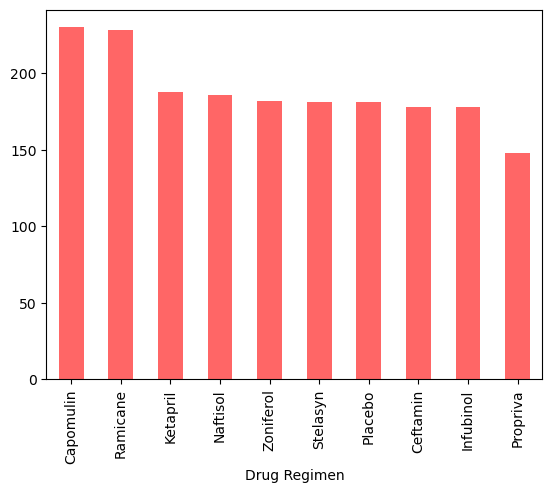

In [162]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
ax = sorted_data.plot.bar(x="Drug Regimen", y="Observed Mouse Timepoints", color="red", alpha=0.6, legend=False)
plt.show()

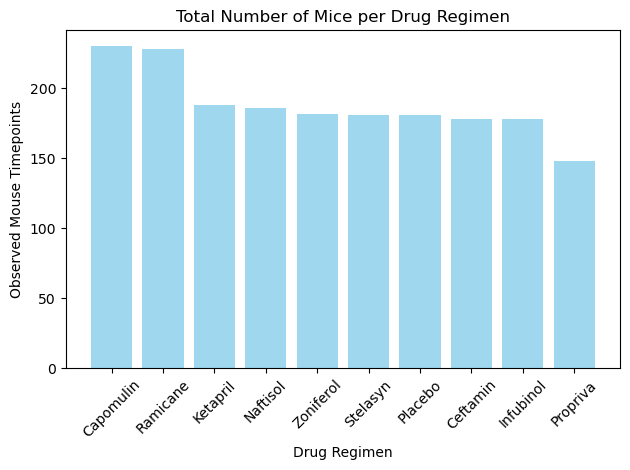

In [163]:

# Plot the bar chart

plt.bar(sorted_data["Drug Regimen"], sorted_data["Observed Mouse Timepoints"], color="skyblue", alpha = 0.8, align = "center")
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse Timepoints')
plt.title('Total Number of Mice per Drug Regimen')
plt.xticks(rotation=45) 
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [180]:



mice_sex = filtered_data.groupby("Sex")["Sex"].value_counts()
mice_sex

Sex
Female    922
Male      958
Name: count, dtype: int64

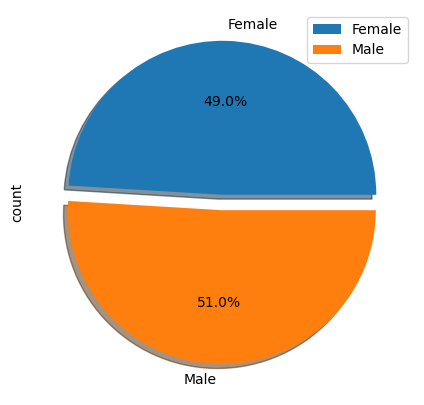

In [183]:
plot = mice_sex.plot.pie(y="Mice sex", figsize=(5, 5), legend="True", shadow=True,autopct='%1.1f%%',explode=[0.05, 0.05])

## Quartiles, Outliers and Boxplots

In [193]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

filtered_data



# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_regimens = filtered_data[filtered_data["Drug Regimen"].isin(treatment_regimens)]
final_tumor_vol = filtered_regimens[filtered_regimens["Timepoint"] == 45]
final_tumor_vol = final_tumor_vol[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
final_tumor_vol


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,b128,Capomulin,38.982878
224,c139,Infubinol,72.226731
243,y163,Infubinol,67.685569
253,k483,Infubinol,66.196912
279,z581,Infubinol,62.754451
...,...,...,...
1844,l897,Capomulin,38.846876
1857,t565,Capomulin,34.455298
1867,i557,Capomulin,47.685963
1877,m957,Capomulin,33.329098


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


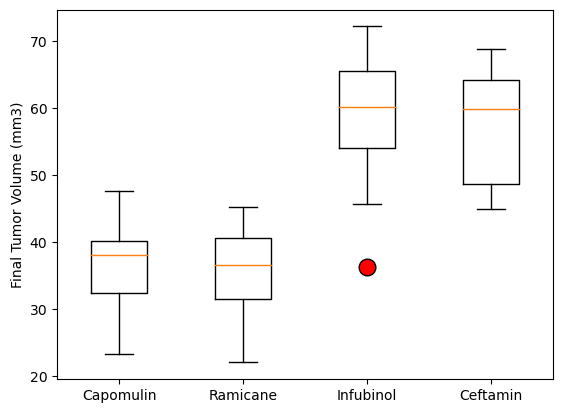

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

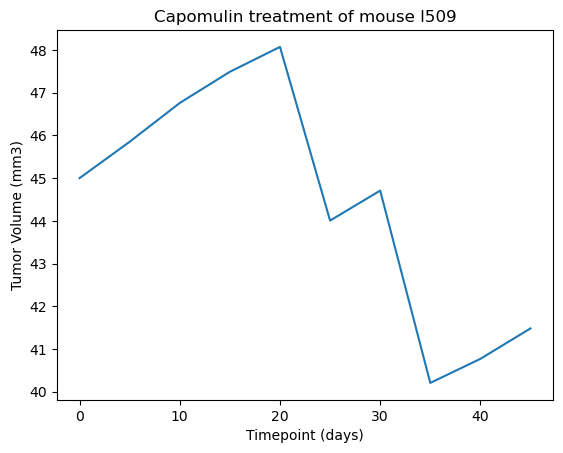

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


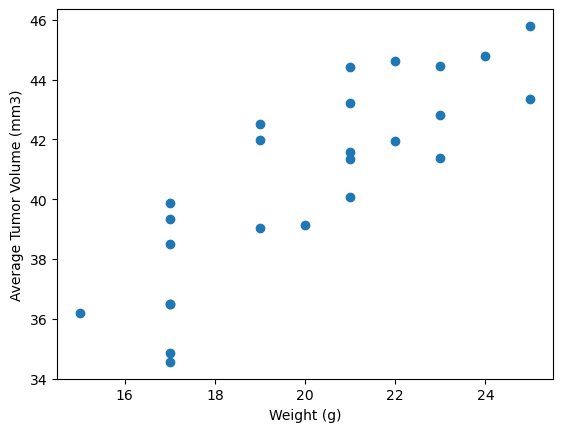

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


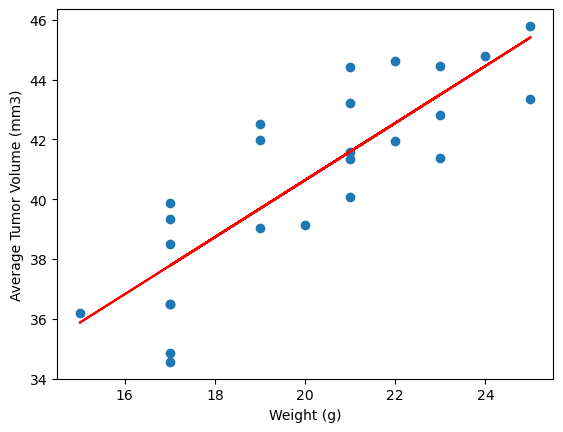

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
